<a href="https://colab.research.google.com/github/Pavanahobilam/pavan/blob/main/AI_TL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### POWER GRID FAILURE ###

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
file_path = '/content/energy-consumption-generation-prices-and-weather.csv'
data = pd.read_csv(file_path)

# Display first few rows to understand structure
print("Initial Data Sample:\n", data.head())
print("\nColumns:", data.columns)

# Convert 'time' to datetime and UNIX timestamp
data['time'] = pd.to_datetime(data['time'], utc=True)
data['time'] = data['time'].astype('int64') // 10**9  # Convert to UNIX timestamp

# Handle missing values
data.fillna(data.mean(), inplace=True)

# Define target variable - Assume 'outage' based on 'total load actual'
data['outage'] = np.where(data['total load actual'] > data['total load actual'].quantile(0.95), 1, 0)

# Drop irrelevant columns (modify as needed)
drop_columns = ['price day ahead', 'price actual']  # Prices might not affect failures
data.drop(columns=drop_columns, inplace=True, errors='ignore')

# Define features (X) and target (y)
X = data.drop(columns=['outage'])
y = data['outage']

# Verify dataset size
print("\nFeature Shape:", X.shape, "Target Shape:", y.shape)

# Split into training & testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (scale to mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Function to predict outages from new data
def predict_outages(new_data):
    new_data = scaler.transform(new_data)  # Scale the new data
    predictions = model.predict(new_data)
    for i, pred in enumerate(predictions):
        if pred == 1:
            print(f"⚠ Potential outage detected in instance {i}. Preventive action needed!")

# Example usage with dummy data (Ensure the shape matches feature count)
new_data_example = np.array([X.iloc[0].values])  # Using first row as test
predict_outages(new_data_example)

Initial Data Sample:
                         time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0      

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count



Confusion Matrix:
 [[10024     0]
 [    0   496]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10024
           1       1.00      1.00      1.00       496

    accuracy                           1.00     10520
   macro avg       1.00      1.00      1.00     10520
weighted avg       1.00      1.00      1.00     10520



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### FAULTS ###

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Generate synthetic power distribution data
np.random.seed(42)
num_samples = 1000

# Simulated power consumption in kWh
power_consumption = np.random.randint(100, 1000, size=num_samples)

# Simulated voltage in volts
voltage = np.random.uniform(220, 240, size=num_samples)

# Simulated current in amps
current = np.random.uniform(5, 20, size=num_samples)

# Create DataFrame
power_data = pd.DataFrame({
    'power_consumption': power_consumption,
    'voltage': voltage,
    'current': current
})

# Display a sample of the synthetic data
print("Sample of synthetic power distribution data:")
print(power_data.head())

# Write synthetic data to a CSV file
power_data.to_csv('synthetic_power_distribution_data.csv', index=False)

# Load data from CSV
data = pd.read_csv('synthetic_power_distribution_data.csv')

# Preprocessing
X = data.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model initialization
model = IsolationForest(contamination=0.01, random_state=42)  # Adjust contamination based on your data

# Model fitting
model.fit(X_scaled)

# Predictions
predictions = model.predict(X_scaled)

# Add predictions to original DataFrame
data['anomaly'] = predictions

# Filter out the anomalies for further investigation
power_theft_cases = data[data['anomaly'] == -1]

# Check if there are any potential power theft cases
if len(power_theft_cases) > 0:
    print("Suspicious activity detected. Potential power theft cases found.")
    print("Power theft cases:")
    print(power_theft_cases)
else:
    print("No suspicious activity detected. Power distribution is normal.")

Sample of synthetic power distribution data:
   power_consumption     voltage    current
0                202  232.732886  15.071370
1                535  231.096312  17.142950
2                960  221.820042  16.499842
3                370  234.527941   7.245560
4                206  230.948926  11.359172
Suspicious activity detected. Potential power theft cases found.
Power theft cases:
     power_consumption     voltage    current  anomaly
110                978  239.945111  17.281025       -1
177                991  228.774894  19.457334       -1
292                983  236.731296  19.675959       -1
424                116  221.555307   5.105438       -1
563                195  220.101643  19.696737       -1
578                960  237.289858  19.820983       -1
609                199  220.181448  19.876139       -1
793                544  239.842666  19.868948       -1
952                100  239.093201  18.938861       -1
973                990  235.995622  19.056365       -1


### PREVENT BROWNOUTS WITH REALTIME MONITORING AND AI PREDICTION ###

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Sample data
data = {
    'generation_biomass': [447.0, 449.0, 448.0, 438.0, 428.0],
    'generation_fossil_brown_coal_lignite': [2000.0, 2100.0, 2050.0, 2150.0, 2200.0],
    'generation_fossil_gas': [1000.0, 1050.0, 1025.0, 1075.0, 1100.0],
    'total_load_actual': [5000.0, 5100.0, 5050.0, 5150.0, 5200.0],
    'price_day_ahead': [50.10, 48.10, 47.33, 42.27, 38.41],
    'price_actual': [65.41, 64.92, 64.48, 59.32, 56.04]
}

# Create DataFrame
df = pd.DataFrame(data)

# For demonstration, let's create a mock 'outage' column based on some condition
df['outage'] = np.where(df['total_load_actual'] > df['total_load_actual'].quantile(0.95), 1, 0)

# Drop unnecessary columns and handle missing values
df = df.dropna()
X = df.drop('outage', axis=1)
y = df['outage']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print evaluation metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

# Function to predict outages and trigger preventive measures
def predict_and_prevent_outages(new_data):
    # Standardize the new data
    new_data = scaler.transform(new_data)

    # Predict outages
    predictions = model.predict(new_data)

    # Trigger preventive measures for predicted outages
    for i, prediction in enumerate(predictions):
        if prediction == 1:
            print(f"Potential outage detected in instance {i}. Triggering preventive measures...")

# Example new data
# Replace the placeholder [...] with actual new data you want to predict on
new_data = np.array([
    [450.0, 2100.0, 1050.0, 5100.0, 49.0, 65.0],  # Example row
    [430.0, 2200.0, 1100.0, 5200.0, 39.0, 55.0]   # Example row
])

# Predict and prevent outages
predict_and_prevent_outages(new_data)

[[1 0]
 [1 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.75      0.50      0.33         2
weighted avg       0.75      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### DECTECT POWER GRID FAULTS ###

In [5]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from scipy import signal


# Function to apply Continuous Wavelet Transformation (CWT) to data
def apply_cwt(data):
    widths = np.arange(1, 31)  # Define the range of widths for the wavelet transform
    cwt_matrix = signal.cwt(data, signal.ricker, widths)  # Apply the Ricker wavelet
    cwt_flattened = cwt_matrix.flatten()  # Flatten the matrix into a single feature vector
    return cwt_flattened


# Function to extract features from the dataset
def extract_features(data):
    features = []
    for recording in data:
        coeffs = apply_cwt(recording)
        features.append(coeffs)
    return np.array(features)


# Function to train SVM model
def train_svm(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    svm_classifier = SVC(kernel='rbf')  # Radial Basis Function (RBF) kernel is commonly used
    svm_classifier.fit(X_train, y_train)
    return svm_classifier, X_test, y_test


# Function to evaluate the SVM model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=1))


# Main function for deployment
def main():
    # Sample data for demonstration purposes
    data = {
        'generation_biomass': [447.0, 449.0, 448.0, 438.0, 428.0],
        'generation_fossil_brown_coal_lignite': [2000.0, 2100.0, 2050.0, 2150.0, 2200.0],
        'generation_fossil_gas': [1000.0, 1050.0, 1025.0, 1075.0, 1100.0],
        'total_load_actual': [5000.0, 5100.0, 5050.0, 5150.0, 5200.0],
        'price_day_ahead': [50.10, 48.10, 47.33, 42.27, 38.41],
        'price_actual': [65.41, 64.92, 64.48, 59.32, 56.04]
    }

    df = pd.DataFrame(data)

    # Mock 'outage' column based on some condition for demonstration
    df['outage'] = np.where(df['total_load_actual'] > df['total_load_actual'].quantile(0.95), 1, 0)

    # Drop unnecessary columns and handle missing values
    df = df.dropna()
    X = df.drop('outage', axis=1).values
    y = df['outage'].values

    # Extract features from the data using CWT
    X_features = extract_features(X)

    # Train SVM model
    svm_model, X_test, y_test = train_svm(X_features, y)

    # Evaluate the trained model
    print("Evaluation Report:")
    evaluate_model(svm_model, X_test, y_test)

    # Deployment phase with new data
    # Assuming new_data contains new voltage recordings (replace this with actual new data)
    new_data = np.array([
        [450.0, 2100.0, 1050.0, 5100.0, 49.0, 65.0],  # Example row
        [430.0, 2200.0, 1100.0, 5200.0, 39.0, 55.0]  # Example row
    ])
    new_data_features = extract_features(new_data)
    predicted_faults = svm_model.predict(new_data_features)
    print("Predicted faults for new data:", predicted_faults)


if __name__ == "__main__":
    main()

Evaluation Report:
[[1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Predicted faults for new data: [0 0]


<ipython-input-5-e0ab81d18dc0>:12: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = signal.cwt(data, signal.ricker, widths)  # Apply the Ricker wavelet
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
<ipython-input-5-e0ab81d18dc0>:12: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = signal.cwt(data, signal.ricker, widths)  # Apply the Ricker wavelet


### DECTECT ENERGY THEFT ###

Generating and forecasting energy demand...


<ipython-input-7-8082f60712c1>:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2020-01-01', end='2023-01-01', freq='H')


Synthetic energy demand data saved as 'synthetic_energy_demand.csv'


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0dg02d29/ytd4ljs1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0dg02d29/xzr4t59m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8239', 'data', 'file=/tmp/tmp0dg02d29/ytd4ljs1.json', 'init=/tmp/tmp0dg02d29/xzr4t59m.json', 'output', 'file=/tmp/tmp0dg02d29/prophet_model8l6itfvz/prophet_model-20250324074323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


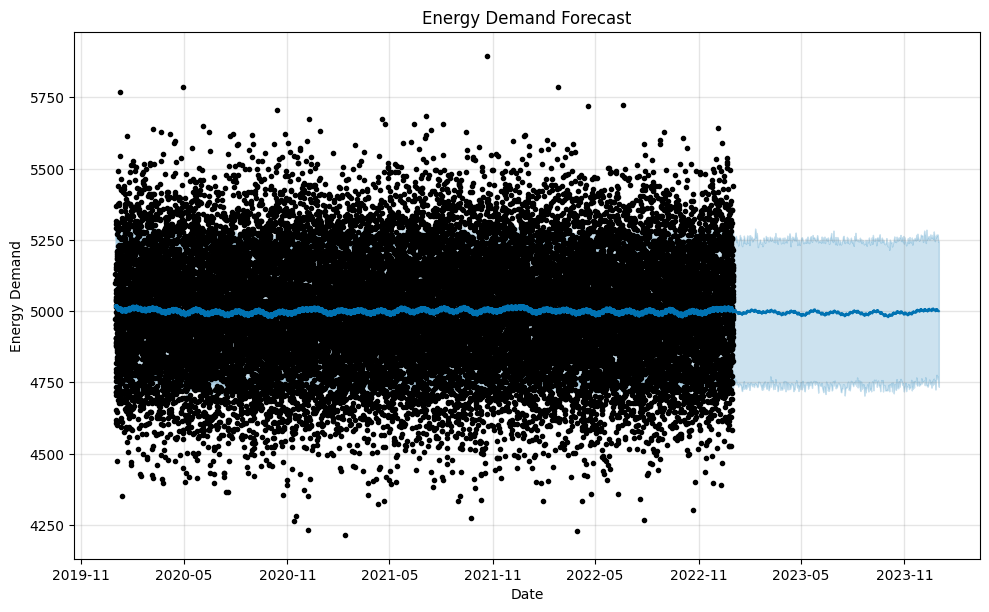

Generating and forecasting renewable energy output...


<ipython-input-7-8082f60712c1>:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2020-01-01', end='2023-01-01', freq='H')


Synthetic renewable energy output data saved as 'synthetic_renewable_energy_output.csv'
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


526/526 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - loss: 2731164.5000 - val_loss: 2704318.0000
Epoch 2/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - loss: 2652618.2500 - val_loss: 2618820.2500
Epoch 3/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - loss: 2564419.2500 - val_loss: 2536234.5000
Epoch 4/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - loss: 2468049.2500 - val_loss: 2455638.7500
Epoch 5/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - loss: 2393803.2500 - val_loss: 2376844.2500
Epoch 6/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - loss: 2315609.7500 - val_loss: 2299642.7500
Epoch 7/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - loss: 2240276.5000 - val_loss: 2223975.7500
Epoch 8/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - loss: 2165864.0000 - val_loss: 2149784.0000
Epoch 9/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - loss: 2098780.7500 - val_loss: 2077013.5000
Epoch 10/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - loss: 2026708.0000 - val_loss: 2005624.5000
Epoch 11/2

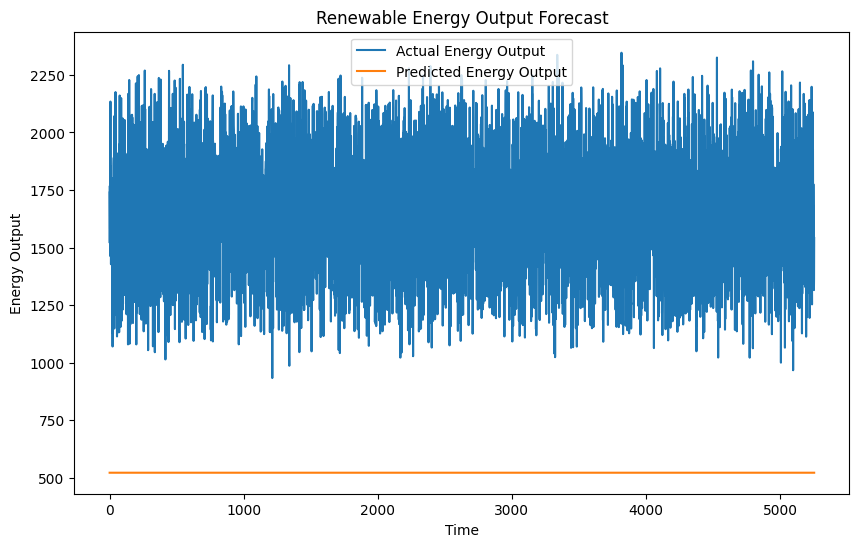

Detecting energy theft...
[[2668   44]
 [  36  252]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2712
           1       0.85      0.88      0.86       288

    accuracy                           0.97      3000
   macro avg       0.92      0.93      0.92      3000
weighted avg       0.97      0.97      0.97      3000

Fraud Predictions: [1 1 0 1]


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from prophet import Prophet


# Generate synthetic energy demand data
def generate_synthetic_energy_demand():
    dates = pd.date_range(start='2020-01-01', end='2023-01-01', freq='H')
    np.random.seed(42)
    energy_demand = 5000 + np.random.normal(0, 200, len(dates))
    data = pd.DataFrame({'ds': dates, 'y': energy_demand})
    data.to_csv('/content/synthetic_energy_demand.csv', index=False)
    print("Synthetic energy demand data saved as 'synthetic_energy_demand.csv'")
    return data


# Generate synthetic renewable energy output data
def generate_synthetic_renewable_energy_output():
    dates = pd.date_range(start='2020-01-01', end='2023-01-01', freq='H')
    np.random.seed(42)
    wind_speed = np.random.uniform(0, 25, len(dates))
    temperature = np.random.uniform(-10, 35, len(dates))
    sunlight = np.random.uniform(0, 1, len(dates))
    humidity = np.random.uniform(0, 100, len(dates))
    energy_output = 1000 + wind_speed * 30 + temperature * 2 + sunlight * 500 + np.random.normal(0, 50, len(dates))
    data = pd.DataFrame({
        'date': dates,
        'wind_speed': wind_speed,
        'temperature': temperature,
        'sunlight': sunlight,
        'humidity': humidity,
        'energy_output': energy_output
    })
    data.to_csv('/content/synthetic_energy_demand.csv', index=False)
    print("Synthetic renewable energy output data saved as 'synthetic_renewable_energy_output.csv'")
    return data


# Forecasting energy demand with Facebook Prophet
def forecast_energy_demand(data):
    model = Prophet()
    model.fit(data)
    future = model.make_future_dataframe(periods=365)  # Forecasting for the next year
    forecast = model.predict(future)
    fig = model.plot(forecast)
    plt.title('Energy Demand Forecast')
    plt.xlabel('Date')
    plt.ylabel('Energy Demand')
    plt.show()


# Prepare the data for LSTM
def create_sequences(data, target, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:i + sequence_length]
        y = target[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)


# Forecasting renewable energy output with LSTM
def forecast_renewable_energy_output(data):
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)

    features = data[['wind_speed', 'temperature', 'sunlight', 'humidity']]
    target = data['energy_output']

    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(features)

    sequence_length = 30  # 30 days sequence
    X, y = create_sequences(scaled_features, target.values, sequence_length)

    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

    loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {loss}')

    predictions = model.predict(X_test)

    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Actual Energy Output')
    plt.plot(predictions, label='Predicted Energy Output')
    plt.title('Renewable Energy Output Forecast')
    plt.xlabel('Time')
    plt.ylabel('Energy Output')
    plt.legend()
    plt.show()


# Generate synthetic energy usage data
def generate_synthetic_data(num_samples=10000):
    np.random.seed(42)
    customer_ids = np.arange(1, num_samples + 1)

    # Generate normal usage patterns
    normal_usage = np.random.normal(loc=100, scale=20, size=num_samples)

    # Introduce some fraudulent patterns
    fraud_percentage = 0.1
    num_fraud = int(fraud_percentage * num_samples)
    fraud_indices = np.random.choice(num_samples, num_fraud, replace=False)
    fraud_usage = normal_usage[fraud_indices] * np.random.uniform(1.5, 3.0, num_fraud)  # 50% to 200% more usage

    # Combine normal and fraudulent usage
    usage = normal_usage.copy()
    usage[fraud_indices] = fraud_usage

    # Create DataFrame
    data = pd.DataFrame({
        'customer_id': customer_ids,
        'energy_usage': usage,
        'is_fraud': [1 if i in fraud_indices else 0 for i in range(num_samples)]
    })

    return data


# Load and prepare the data
def load_and_prepare_data():
    # Load the synthetic data
    data = generate_synthetic_data()

    # Generate additional features
    data['usage_deviation'] = np.abs(data['energy_usage'] - data['energy_usage'].mean())
    data['high_usage'] = (data['energy_usage'] > data['energy_usage'].quantile(0.95)).astype(int)

    return data


# Train the model to detect energy theft
def train_model(data):
    # Prepare the feature matrix X and target vector y
    X = data[['energy_usage', 'usage_deviation', 'high_usage']]
    y = data['is_fraud']

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize and train the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Print evaluation metrics
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    return model


# Function to detect fraud in new data
def detect_fraud(model, new_data):
    predictions = model.predict(new_data)
    return predictions


def main():
    # Generate and forecast energy demand
    print("Generating and forecasting energy demand...")
    energy_demand_data = generate_synthetic_energy_demand()
    forecast_energy_demand(energy_demand_data)

    # Generate and forecast renewable energy output
    print("Generating and forecasting renewable energy output...")
    renewable_energy_data = generate_synthetic_renewable_energy_output()
    forecast_renewable_energy_output(renewable_energy_data)

    # Detect energy theft
    print("Detecting energy theft...")
    data = load_and_prepare_data()
    model = train_model(data)

    # Example new data (Replace with actual new data for real use case)
    new_data = pd.DataFrame({
        'energy_usage': [150, 250, 90, 300],  # Example values
        'usage_deviation': [10, 20, 5, 30],  # Example values
        'high_usage': [1, 1, 0, 1]  # Example values
    })

    # Detect fraud in new data
    fraud_predictions = detect_fraud(model, new_data)
    print(f"Fraud Predictions: {fraud_predictions}")


if __name__ == "__main__":
    main()

### BALANCE THREW GRID ###

<ipython-input-7-8082f60712c1>:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2020-01-01', end='2023-01-01', freq='H')


Synthetic energy demand data saved as 'synthetic_energy_demand.csv'


<ipython-input-7-8082f60712c1>:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2020-01-01', end='2023-01-01', freq='H')


Synthetic renewable energy output data saved as 'synthetic_renewable_energy_output.csv'
Forecasting Energy Demand:


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0dg02d29/6p7qlhgq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0dg02d29/qjxbwuzw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79243', 'data', 'file=/tmp/tmp0dg02d29/6p7qlhgq.json', 'init=/tmp/tmp0dg02d29/qjxbwuzw.json', 'output', 'file=/tmp/tmp0dg02d29/prophet_model2fk5tuij/prophet_model-20250324075040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


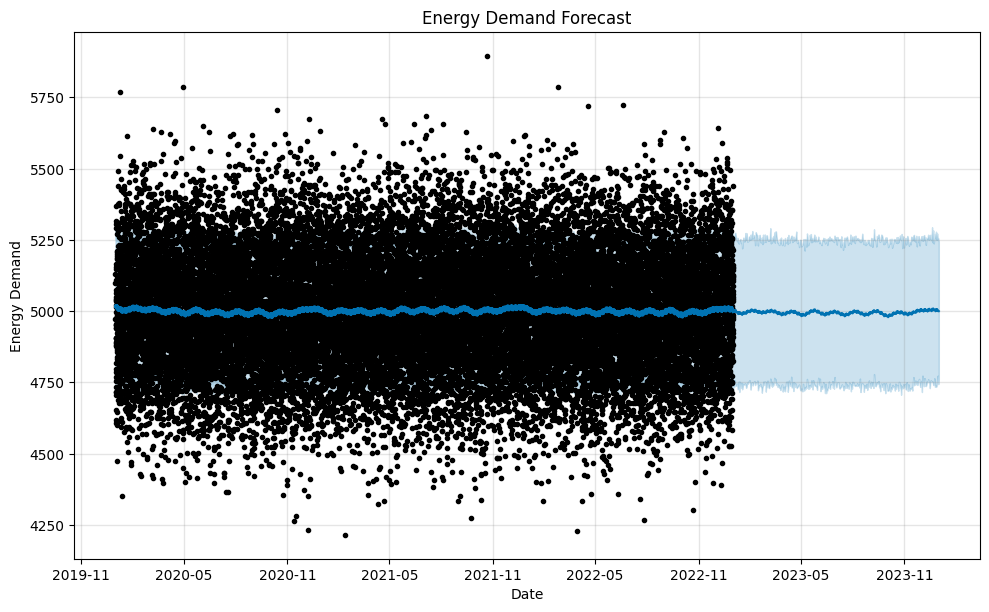

Forecasting Renewable Energy Output:
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


526/526 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - loss: 2759426.5000 - val_loss: 2708408.5000
Epoch 2/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - loss: 2644661.0000 - val_loss: 2623289.7500
Epoch 3/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - loss: 2570358.5000 - val_loss: 2537266.5000
Epoch 4/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - loss: 2485128.5000 - val_loss: 2454810.5000
Epoch 5/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - loss: 2400183.2500 - val_loss: 2374354.7500
Epoch 6/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - loss: 2323736.2500 - val_loss: 2295662.5000
Epoch 7/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - loss: 2239886.0000 - val_loss: 2218567.0000
Epoch 8/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - loss: 2173681.5000 - val_loss: 2143030.5000
Epoch 9/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - loss: 2084136.1250 - val_loss: 2068954.5000
Epoch 10/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - loss: 2021434.7500 - val_loss: 1996357.6250
Epoch 11/2

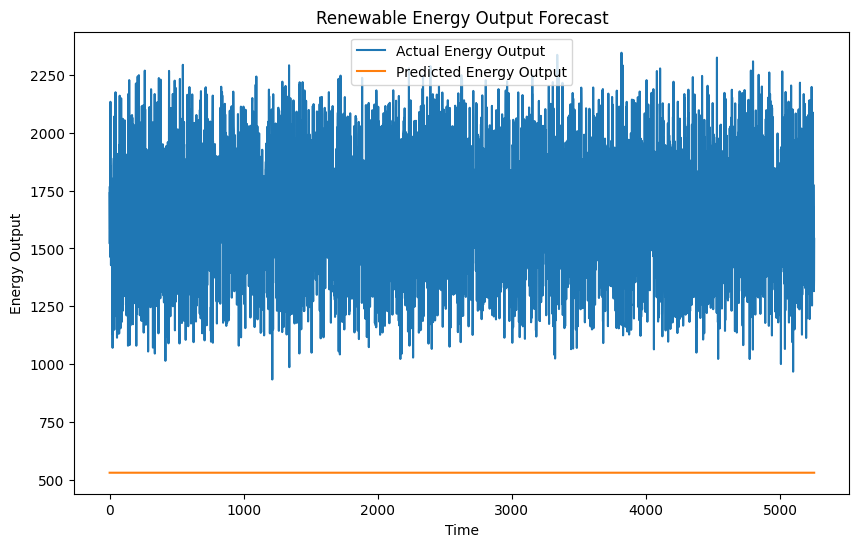

Balancing Energy Through Grid:
Columns in renewable energy dataset: Index(['wind_speed', 'temperature', 'sunlight', 'humidity', 'energy_output'], dtype='object')


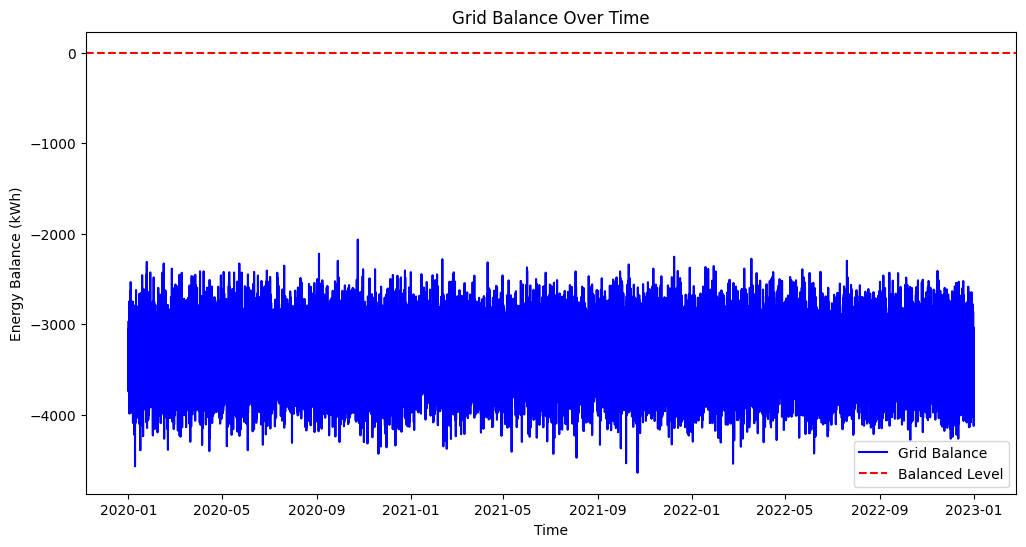

                   ds            y  wind_speed  temperature  sunlight  \
0 2020-01-01 00:00:00  5099.342831    9.363503    -8.409653  0.545376   
1 2020-01-01 01:00:00  4972.347140   23.767858     2.405465  0.133057   
2 2020-01-01 02:00:00  5129.537708   18.299849    34.481432  0.248272   
3 2020-01-01 03:00:00  5304.605971   14.966462     2.160313  0.906791   
4 2020-01-01 04:00:00  4953.169325    3.900466    19.866762  0.697118   

    humidity  energy_output  grid_balance   status  
0  97.274194    1473.862285  -3625.480546  Deficit  
1  87.661014    1822.951340  -3149.395800  Deficit  
2  71.992414    1735.891031  -3393.646677  Deficit  
3  43.278341    1923.734418  -3380.871554  Deficit  
4  21.452426    1498.853155  -3454.316170  Deficit  


In [9]:
def balance_grid(energy_demand, renewable_energy):
    energy_demand['ds'] = pd.to_datetime(energy_demand['ds'])
    print("Columns in renewable energy dataset:", renewable_energy.columns)  # Debugging line

    # Merge datasets on timestamp
    grid_data = pd.merge(energy_demand, renewable_energy, left_on='ds', right_on='date')

    # Compute energy surplus or deficit
    grid_data['grid_balance'] = grid_data['energy_output'] - grid_data['y']

    # Determine action based on surplus/deficit
    grid_data['status'] = grid_data['grid_balance'].apply(lambda x: 'Surplus' if x > 0 else 'Deficit')

    # Plot Grid Balance
    plt.figure(figsize=(12, 6))
    plt.plot(grid_data['ds'], grid_data['grid_balance'], label="Grid Balance", color='blue')
    plt.axhline(y=0, color='red', linestyle='--', label="Balanced Level")
    plt.xlabel("Time")
    plt.ylabel("Energy Balance (kWh)")
    plt.title("Grid Balance Over Time")
    plt.legend()
    plt.show()

    return grid_data

# Modify main function to include grid balancing
def main():
    # Generate synthetic data
    energy_demand_data = generate_synthetic_energy_demand()
    renewable_energy_data = generate_synthetic_renewable_energy_output()

    # Forecast energy demand
    print("Forecasting Energy Demand:")
    forecast_energy_demand(energy_demand_data)

    # Forecast renewable energy output
    print("Forecasting Renewable Energy Output:")
    forecast_renewable_energy_output(renewable_energy_data)

    # Balance energy through the grid
    print("Balancing Energy Through Grid:")
    grid_status = balance_grid(energy_demand_data, renewable_energy_data)
    print(grid_status.head())

if __name__ == "__main__":
    main()